# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sn

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
cities = [city.title() for city in cities]
cities

['Longyearbyen',
 'Hermanus',
 'Busselton',
 'Inirida',
 'Yellowknife',
 'Avarua',
 'Arraial Do Cabo',
 'Punta Arenas',
 'Cabo San Lucas',
 'Wilmington',
 'At-Bashi',
 'Albany',
 'Upernavik',
 'Guerrero Negro',
 'Nikolskoye',
 'Torbay',
 'The Valley',
 'Tuktoyaktuk',
 'Kamarai',
 'Taolanaro',
 'Taburi',
 'Ushuaia',
 'Illoqqortoormiut',
 'Marcona',
 'Moose Factory',
 'Tsihombe',
 'Palabuhanratu',
 'Akyab',
 'Raudeberg',
 'Thompson',
 'Namatanai',
 'Barrow',
 'Mar Del Plata',
 'Attawapiskat',
 'Meulaboh',
 'Zyryanka',
 'Menongue',
 'Cape Town',
 'Egvekinot',
 'Dzaoudzi',
 'Faanui',
 'Havre-Saint-Pierre',
 'Mataura',
 'Muzhi',
 'Luderitz',
 'Provideniya',
 'Castro',
 'Laguna',
 'Palmer',
 'Buin',
 'Lakatoro',
 'Vaini',
 'Fortuna',
 'Kapaa',
 'Georgetown',
 'Jamestown',
 'Zyryanskoye',
 'Miranda',
 'Lasa',
 'Talnakh',
 'Tshela',
 'Saskylakh',
 'Ancud',
 'Hilo',
 'Hasaki',
 'Tasiilaq',
 'Bluff',
 'Bosaso',
 'Cherskiy',
 'Bolungarvik',
 'Seddon',
 'Kaitangata',
 'Nanortalik',
 'Luang Prabang

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create query url for any city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city= "Rikitea"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

#Get data
response = requests.get(query_url).json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1588624761,
 'id': 4030556,
 'main': {'feels_like': 71.15,
          'grnd_level': 1014,
          'humidity': 69,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1588605677, 'sunset': 1588645909},
 'timezone': -32400,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 145, 'speed': 11.59}}


In [5]:
#Loop through cities to get data
locID = []
maxtemp =[]
humid=[]
clouds=[]
windspeed=[]
country=[]
lat=[]
lng=[]
date=[]

#test before running through all cities. Including a city that does not show up on openweathermap.
testcities = ["Dallas", "Austin", "New York", "Belushya Guba", "Seattle"]

#Use city in testcities to test, city in cities for full list.
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
    try:
        locID.append(response['id'])
    except KeyError:
        locID.append('NaN')
    try:
        maxtemp.append(response['main']['temp_max'])
    except KeyError:
        maxtemp.append('NaN')
    try:
        humid.append(response['main']['humidity'])
    except KeyError:
        humid.append('NaN')
    try:
        clouds.append(response['clouds']['all'])
    except KeyError:
        clouds.append('NaN')
    try:
        windspeed.append(response['wind']['speed'])
    except KeyError:
        windspeed.append('NaN')
    try:
        country.append(response['sys']['country'])
    except KeyError:
        country.append('NaN')
    try:
        lat.append(response['coord']['lat'])
    except KeyError:
        lat.append('NaN')       
    try:
        lng.append(response['coord']['lon'])
    except KeyError:
        lng.append('NaN')  
    try:
        date.append(response['dt'])
    except KeyError:
        date.append('NaN') 
    print(f"Number of cities: {len(locID)}. Current City: {city}. ")
    time.sleep(1)


Number of cities: 1. Current City: Longyearbyen. 
Number of cities: 2. Current City: Hermanus. 
Number of cities: 3. Current City: Busselton. 
Number of cities: 4. Current City: Inirida. 
Number of cities: 5. Current City: Yellowknife. 
Number of cities: 6. Current City: Avarua. 
Number of cities: 7. Current City: Arraial Do Cabo. 
Number of cities: 8. Current City: Punta Arenas. 
Number of cities: 9. Current City: Cabo San Lucas. 
Number of cities: 10. Current City: Wilmington. 
Number of cities: 11. Current City: At-Bashi. 
Number of cities: 12. Current City: Albany. 
Number of cities: 13. Current City: Upernavik. 
Number of cities: 14. Current City: Guerrero Negro. 
Number of cities: 15. Current City: Nikolskoye. 
Number of cities: 16. Current City: Torbay. 
Number of cities: 17. Current City: The Valley. 
Number of cities: 18. Current City: Tuktoyaktuk. 
Number of cities: 19. Current City: Kamarai. 
Number of cities: 20. Current City: Taolanaro. 
Number of cities: 21. Current City:

Number of cities: 173. Current City: Atocha. 
Number of cities: 174. Current City: Louisbourg. 
Number of cities: 175. Current City: Broome. 
Number of cities: 176. Current City: Katsuura. 
Number of cities: 177. Current City: High Rock. 
Number of cities: 178. Current City: Nuoro. 
Number of cities: 179. Current City: Ponta Do Sol. 
Number of cities: 180. Current City: Sault Sainte Marie. 
Number of cities: 181. Current City: Kavaratti. 
Number of cities: 182. Current City: Bull Savanna. 
Number of cities: 183. Current City: Turan. 
Number of cities: 184. Current City: Angoche. 
Number of cities: 185. Current City: Dingle. 
Number of cities: 186. Current City: Portland. 
Number of cities: 187. Current City: Umzimvubu. 
Number of cities: 188. Current City: Muzquiz. 
Number of cities: 189. Current City: Genc. 
Number of cities: 190. Current City: San Miguel. 
Number of cities: 191. Current City: Cerqueira Cesar. 
Number of cities: 192. Current City: Port Hedland. 
Number of cities: 193.

Number of cities: 344. Current City: Saint-Pierre. 
Number of cities: 345. Current City: Nerchinskiy Zavod. 
Number of cities: 346. Current City: Cap Malheureux. 
Number of cities: 347. Current City: Okhotsk. 
Number of cities: 348. Current City: Auki. 
Number of cities: 349. Current City: Naftah. 
Number of cities: 350. Current City: Fare. 
Number of cities: 351. Current City: Quelimane. 
Number of cities: 352. Current City: Lyuban. 
Number of cities: 353. Current City: Narsaq. 
Number of cities: 354. Current City: Asekeyevo. 
Number of cities: 355. Current City: Manzanillo. 
Number of cities: 356. Current City: Saravan. 
Number of cities: 357. Current City: Wisconsin Rapids. 
Number of cities: 358. Current City: Westport. 
Number of cities: 359. Current City: Changji. 
Number of cities: 360. Current City: Sidi Ali. 
Number of cities: 361. Current City: Turangi. 
Number of cities: 362. Current City: Ixtapa. 
Number of cities: 363. Current City: Greenville. 
Number of cities: 364. Curr

Number of cities: 515. Current City: Taltal. 
Number of cities: 516. Current City: Whitehorse. 
Number of cities: 517. Current City: Mahanoro. 
Number of cities: 518. Current City: Brajrajnagar. 
Number of cities: 519. Current City: Marsa Matruh. 
Number of cities: 520. Current City: Otacilio Costa. 
Number of cities: 521. Current City: Aleksandrovskiy Zavod. 
Number of cities: 522. Current City: Nenjiang. 
Number of cities: 523. Current City: Samarai. 
Number of cities: 524. Current City: Mayumba. 
Number of cities: 525. Current City: Ecoporanga. 
Number of cities: 526. Current City: Miandrivazo. 
Number of cities: 527. Current City: Karlstad. 
Number of cities: 528. Current City: Sarankhola. 
Number of cities: 529. Current City: Basoko. 
Number of cities: 530. Current City: Smolenka. 
Number of cities: 531. Current City: Zhigansk. 
Number of cities: 532. Current City: Wajima. 
Number of cities: 533. Current City: Camacha. 
Number of cities: 534. Current City: Pokosnoye. 
Number of ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create df
city_df = pd.DataFrame(list(zip(locID, cities, country, lat, lng, maxtemp, humid, clouds, windspeed, date)), 
               columns =['City ID', 'City', 'Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'])
city_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,2729907,Longyearbyen,SJ,78.22,15.64,24.8,73,75,12.75,1588624773
1,3366880,Hermanus,ZA,-34.42,19.23,59,90,49,1.01,1588624758
2,2075265,Busselton,AU,-33.65,115.33,54,74,98,11.39,1588624775
3,3671450,Inirida,CO,3.87,-67.92,78.62,87,100,3.18,1588624776
4,6185377,Yellowknife,CA,62.46,-114.35,37.4,51,20,8.05,1588624777


In [7]:
#convert objects to floats
city_df['Lat'] = city_df['Lat'].astype(float)
city_df['Lng'] = city_df['Lng'].astype(float)
city_df['Max Temp'] = city_df['Max Temp'].astype(float)
city_df['Humidity'] = city_df['Humidity'].astype(float)
city_df['Cloudiness'] = city_df['Cloudiness'].astype(float)
city_df['Wind Speed'] = city_df['Wind Speed'].astype(float)
city_df.dtypes




City ID        object
City           object
Country        object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date           object
dtype: object

In [8]:
#delete rows with NaN values
clean_city_df = city_df.dropna()
len(clean_city_df)

546

In [9]:
clean_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,20.058022,15.227143,62.447234,67.990842,51.173993,8.068645
std,33.137768,92.361421,20.084326,21.978344,38.637494,5.694544
min,-54.800000,-179.170000,0.550000,8.000000,0.000000,0.220000
25%,-7.622500,-64.965000,48.000000,55.000000,12.250000,3.780000
50%,22.495000,15.840000,66.045000,73.000000,50.000000,6.665000
75%,49.177500,101.860000,79.105000,85.000000,90.750000,11.005000
max,78.220000,179.320000,102.850000,100.000000,100.000000,38.030000


In [10]:
#write to csv
clean_city_df.to_csv("CityWeather.csv", index=False)

In [11]:
#read csv
cityweather_df = pd.read_csv("CityWeather.csv")
cityweather_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,2729907,Longyearbyen,SJ,78.22,15.64,24.80,73.0,75.0,12.75,1588624773
1,3366880,Hermanus,ZA,-34.42,19.23,59.00,90.0,49.0,1.01,1588624758
2,2075265,Busselton,AU,-33.65,115.33,54.00,74.0,98.0,11.39,1588624775
3,3671450,Inirida,CO,3.87,-67.92,78.62,87.0,100.0,3.18,1588624776
4,6185377,Yellowknife,CA,62.46,-114.35,37.40,51.0,20.0,8.05,1588624777


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
mask = cityweather_df.Humidity <=100
humid_df = cityweather_df.loc[mask].reset_index(drop=True)
print(f"{len(cityweather_df)-len(humid_df)} cities were too humid and removed.")

0 cities were too humid and removed.


In [13]:
humid_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,2729907,Longyearbyen,SJ,78.22,15.64,24.80,73.0,75.0,12.75,1588624773
1,3366880,Hermanus,ZA,-34.42,19.23,59.00,90.0,49.0,1.01,1588624758
2,2075265,Busselton,AU,-33.65,115.33,54.00,74.0,98.0,11.39,1588624775
3,3671450,Inirida,CO,3.87,-67.92,78.62,87.0,100.0,3.18,1588624776
4,6185377,Yellowknife,CA,62.46,-114.35,37.40,51.0,20.0,8.05,1588624777


In [14]:
#Remove date column
del humid_df['Date']
humid_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,2729907,Longyearbyen,SJ,78.22,15.64,24.80,73.0,75.0,12.75
1,3366880,Hermanus,ZA,-34.42,19.23,59.00,90.0,49.0,1.01
2,2075265,Busselton,AU,-33.65,115.33,54.00,74.0,98.0,11.39
3,3671450,Inirida,CO,3.87,-67.92,78.62,87.0,100.0,3.18
4,6185377,Yellowknife,CA,62.46,-114.35,37.40,51.0,20.0,8.05
...,...,...,...,...,...,...,...,...,...
541,3166350,Sorrento,IT,40.63,14.37,62.01,77.0,0.0,4.97
542,496307,Severnyy-Kospashskiy,RU,59.09,57.80,46.00,46.0,0.0,1.01
543,2650983,Droitwich,GB,52.27,-2.15,51.01,82.0,0.0,7.00
544,3092472,Marienburg,PL,54.04,19.03,50.00,100.0,94.0,7.58


In [15]:
# Export the City_Data into a csv

clean_city_df.to_csv("IdealCities.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

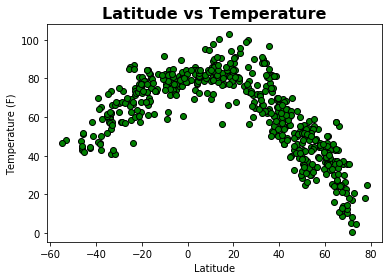

In [16]:
plt.scatter(humid_df.Lat, humid_df['Max Temp'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Humidity Plot

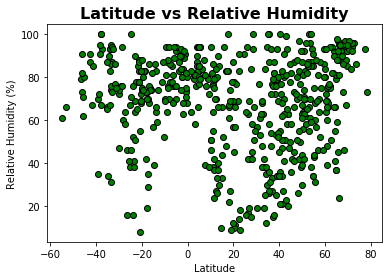

In [17]:
plt.scatter(humid_df.Lat, humid_df['Humidity'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Relative Humidity (%)")
plt.title("Latitude vs Relative Humidity", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Cloudiness Plot

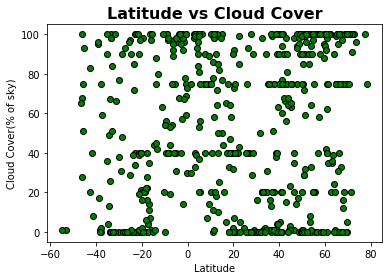

In [18]:
plt.scatter(humid_df.Lat, humid_df['Cloudiness'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(% of sky)")
plt.title("Latitude vs Cloud Cover", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Wind Speed Plot

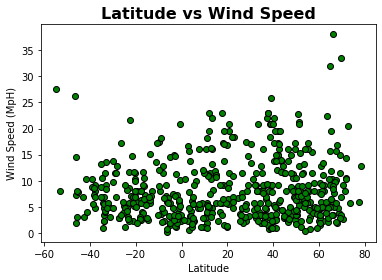

In [19]:
plt.scatter(humid_df.Lat, humid_df['Wind Speed'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MpH)")
plt.title("Latitude vs Wind Speed", fontsize=16, fontweight="bold")
plt.show()

## Linear Regression

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northmask= humid_df.Lat >=0
north_df = humid_df.loc[northmask].reset_index(drop=True)
north_df.describe()

,City ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,2.943485e+06,39.027876,10.729704,59.144839,65.384409,52.314516,8.497258
std,1.825063e+06,20.010243,89.998284,22.153506,23.390741,38.970104,6.101267
min,5.700000e+04,1.240000,-179.170000,0.550000,9.000000,0.000000,0.310000
25%,1.714290e+06,20.842500,-74.087500,42.677500,47.750000,12.750000,3.650000
50%,2.411161e+06,40.825000,11.415000,60.800000,69.500000,58.000000,6.930000
75%,3.998393e+06,54.732500,90.575000,80.012500,84.000000,91.250000,11.410000
max,1.072286e+07,78.220000,179.320000,102.850000,100.000000,100.000000,38.030000


In [21]:
#Create Southern DF
southmask= humid_df.Lat <0
south_df = humid_df.loc[southmask].reset_index(drop=True)
south_df.describe()

,City ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2.698601e+06,-20.498218,24.842356,69.507529,73.563218,48.735632,7.152299
std,1.274775e+06,13.136878,96.786458,12.029137,17.394904,37.912421,4.592077
min,1.526630e+05,-54.800000,-175.200000,41.000000,8.000000,0.000000,0.220000
25%,2.071965e+06,-30.982500,-55.682500,61.630000,68.000000,11.500000,3.785000
50%,2.315222e+06,-20.250000,19.635000,73.400000,76.000000,40.000000,6.160000
75%,3.466636e+06,-8.810000,120.417500,78.732500,86.000000,90.000000,9.060000
max,8.079926e+06,-0.190000,175.930000,91.400000,100.000000,100.000000,27.510000


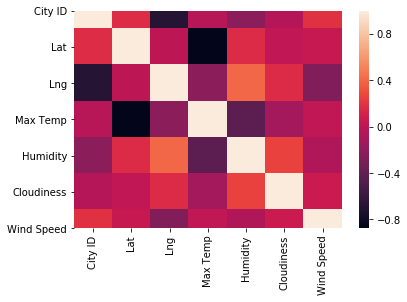

In [22]:
#northern correlations heatmap
sn.heatmap(north_df.corr())

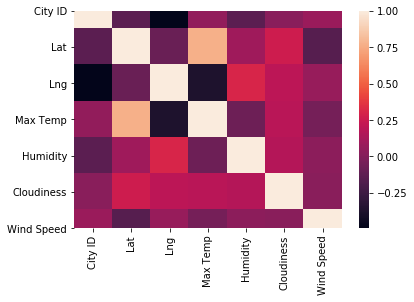

In [23]:
#southern correlations heatmap
sn.heatmap(south_df.corr())

In [24]:
#Regression function
def northregress(x, y):
    x_values = north_df[f'{x}']
    y_values = north_df[f'{y}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='green', edgecolor='black')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y} in the Northern Hemisphere', fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    print(line_eq)
    plt.show()
    
def southregress(x, y):
    x_values = south_df[f'{x}']
    y_values = south_df[f'{y}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='green', edgecolor='black')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y} in the Southern Hemisphere', fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    print(line_eq)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7657143480137082
The p-value is: 1.1970409464756367e-118
y = -0.97x + 96.95


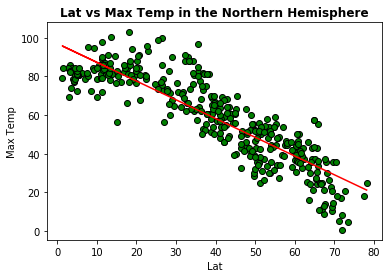

In [25]:
northregress('Lat', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5891021369655818
The p-value is: 4.762545893572622e-35
y = 0.7x + 83.91


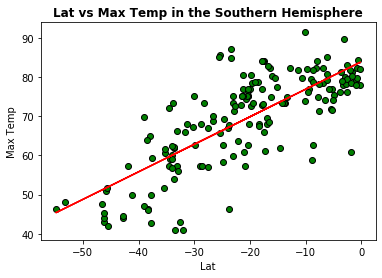

In [26]:
southregress('Lat', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027125858445115857
The p-value is: 0.0014340418614274652
y = 0.19x + 57.87


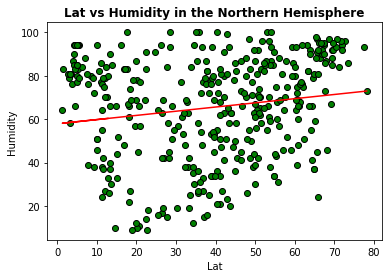

In [27]:
northregress('Lat', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010116037937219729
The p-value is: 0.18666475449384515
y = 0.13x + 76.29


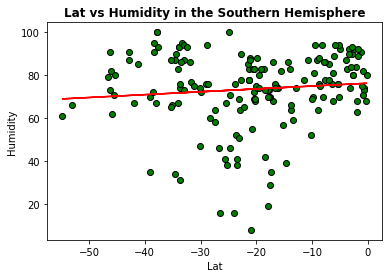

In [28]:
southregress('Lat', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00031824276222249833
The p-value is: 0.731641751581171
y = 0.03x + 50.96


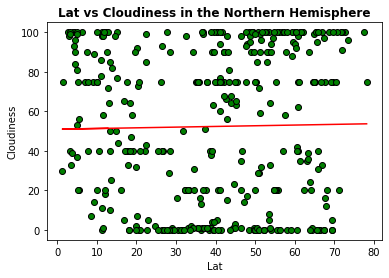

In [29]:
northregress('Lat', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06886614819534549
The p-value is: 0.00046846746641799887
y = 0.76x + 64.26


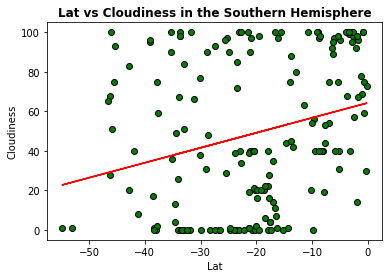

In [30]:
southregress('Lat', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002159170704673952
The p-value is: 0.37148920409711295
y = 0.01x + 7.94


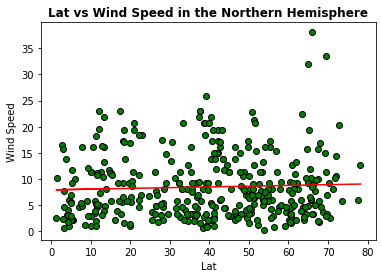

In [31]:
northregress('Lat', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023608211244750484
The p-value is: 0.04294901570769664
y = -0.05x + 6.05


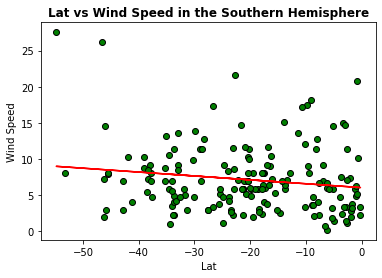

In [32]:
southregress('Lat', 'Wind Speed')

In [33]:
#Final Analysis
print("Weather analysis")
print('x'*106)
print("    When looking at weather statistics and latitudes of hundreds of cities, a few trends become noticable.")
print("Latitude is a better predictor than longitude for two major reasons. First, the distance between degrees")
print("of latiudesis close to a constant measure (it varies slighty because the earth is not a perfect sphere).")
print("The distance between degrees of longitude varies greatly, going from ~69 miles at the equator, to 0 miles ")
print("at each pole. Similarly, the amount of daylight varies little along the same degree of latitude, and varies")
print("dramatically along the same degree of longitude.")
print("")
print("    With this in mind, I have plotted a city's latitude against its high temperature, humidity, wind speed,")
print("and cloudiness. The strongest relationship between a city's latitude and its weather, is with the daily high. ")
print("When looking at r^2 values, latitude appears to explain ~70% of the temperature variation in the Northern")
print("hemisphere, and around 60% of the variation in the Southern Hemisphere. As stated above, this is likely due ")
print("to the similar amounts of sunlight along a given latitude. The difference in the hemispheres might be due to ")
print("the difference in land mass. The South also has more coastline, and weather could be impacted by ocean currents.")
print("")
print("    When plotting latitude against a city's humidity, wind speed, and cloudiness, one does not find strong")
print("relationships. In this data set, these measurements represent the current time. This means the time of day")
print("in which data was taken varies widely over latitude. Humidity tends to be highest at night, when temperatures")
print("are lower. Likewise, wind is typically calmer at night. Because of this limitation, the true relationship")
print("latitude has with wind speed and humidity is unknown. Maximum or average scores would likely have a stronger")
print("relationship.")


Weather analysis
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
    When looking at weather statistics and latitudes of hundreds of cities, a few trends become noticable.
Latitude is a better predictor than longitude for two major reasons. First, the distance between degrees
of latiudesis close to a constant measure (it varies slighty because the earth is not a perfect sphere).
The distance between degrees of longitude varies greatly, going from ~69 miles at the equator, to 0 miles 
at each pole. Similarly, the amount of daylight varies little along the same degree of latitude, and varies
dramatically along the same degree of longitude.

    With this in mind, I have plotted a city's latitude against its high temperature, humidity, wind speed,
and cloudiness. The strongest relationship between a city's latitude and its weather, is with the daily high. 
When looking at r^2 values, latitude appears to explain ~70% of the tempera